In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

list of the colors of matplotlib

'blue'        'red'           'green'        'orange'       'purple'
'cyan'        'magenta'       'yellow'       'lime'         'pink'
'brown'       'grey'          'black'        'white'        'gold'
'salmon'      'skyblue'       'navy'         'coral'        'teal'
'indigo'      'maroon'        'turquoise'    'beige'        'olive'
'violet'      'plum'          'crimson'      'orchid'       'chocolate'
'tomato'      'slateblue'     'forestgreen'  'lightblue'    'darkorange'
'darkred'     'darkgreen'     'darkblue'     'lightgrey'    'khaki'


In [3]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"
# pio.renderers.default = "browser"

In [4]:
from sklearn import cluster
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
# import chardet

original data

In [5]:
# df = pd.read_csv('UK_retailer_e_commerce_Data/data.csv', encoding='latin1')

import os
print(os.getcwd())

c:\Users\rezal\all_connection1247\UK_retailer_e_commerce_Data


second data

In [2]:
# df = pd.read_csv('UK_retailer_ecommerce_data1.csv', delimiter=',')
df_main = pd.read_csv('UK_ecommerce_data11.csv', delimiter=';')

In [26]:
df_distinct = pd.read_csv('dd_category10.csv', delimiter=';')

In [2]:
df = pd.read_csv('UK_ecom_1.csv', delimiter=';')

data on distinct words for categorization

In [21]:
# Round all numeric columns in the dataframe to 2 decimal places
df = df.round(2)

# Display the updated dataframe to verify
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26       3.39     17850.0  United Kingdom  


In [22]:
# Assume df is your dataframe
# Parse the InvoiceDate column as datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Convert it to the desired format
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d %H:%M')

download

In [10]:
# df.to_csv('UK_retailer_e_commerce_Data/UK_retailer_ecommerce_data1.csv', index=False, encoding='utf-8')
word_freq_df.to_csv('distinct_words_for_categorization.csv', index=False, encoding='utf-8')

In [11]:
df_words.to_csv('distinct_categorization.csv', index=False, encoding='utf-8')

In [11]:
distinct_descriptions.to_csv('dd_1.csv', index=False, encoding='utf-8')

In [50]:
# df.info()
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26       3.39     17850.0  United Kingdom  


In [ ]:
non_numeric_ids = df[~df['InvoiceNo'].astype(str).str.isdigit()]

print(non_numeric_ids)

In [35]:
# looking for a poarticular row
row_623 = df.iloc[15016]

print(row_623)

InvoiceNo               C537630
StockCode             AMAZONFEE
Description          AMAZON FEE
Quantity                     -1
InvoiceDate    2010-12-07 15:04
UnitPrice              13541.33
CustomerID                  NaN
Country          United Kingdom
Name: 15016, dtype: object


In [42]:
# Assuming 'InvoiceNo' is the column you're interested in
value = df['InvoiceNo'][536552]  # Access the value at row 0
num_characters = len(str(value))  # Convert to string just in case it's not
print(num_characters)

6


To filter a record in a pandas DataFrame based on values in specific columns (e.g., InvoiceID and StockCode), you can use filtering with logical conditions. Here's how:


In [69]:
# Assuming 'InvoiceID' and 'StockCode' are column names    552042	21199

invoice_id = '552042'  # Replace with the desired InvoiceID
stock_code = '21199'  # Replace with the desired StockCode

# Filter for the specific record
filtered_record = df[(df['InvoiceNo'] == invoice_id) & (df['StockCode'] == stock_code)]

# print(filtered_record)
filtered_record

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
176402,552042,21199,PINK HEART CONFETTI IN TUBE,12,2011-05-06 09:00,1.65,13952.0,United Kingdom


Find the records with null values in description 

In [ ]:
# Find rows where the Description column is null
null_descriptions = df[df['Description'].isnull()]

# Display the rows with null values
print(null_descriptions)

In [57]:
num_null_descriptions = df['Description'].isnull().sum()
print(f"Number of null values in Description: {num_null_descriptions}")

Number of null values in Description: 1454


deleting those null in the description records

In [58]:
# Drop rows where the Description column is null
df = df.dropna(subset=['Description'])

# Verify the records are removed
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice  CustomerID         Country  
0       2

-------------------------------------------------------------------------------------

sales_trends_over_time.csv

In [6]:
df = pd.read_csv('UK_retailer_e_commerce_Data/sales_trends_over_time.csv', encoding='latin1')

In [7]:
df

,sales_date,gross_sales,returns,net_sales
0,2010-12-01,58960.79,-325.23,58635.56
1,2010-12-02,47748.38,-1541.10,46207.28
2,2010-12-03,46943.71,-1323.25,45620.46
3,2010-12-05,31774.95,-391.00,31383.95
4,2010-12-06,54830.46,-970.28,53860.18
...,...,...,...,...
300,2011-12-05,88741.96,-30990.64,57751.32
301,2011-12-06,56713.21,-2484.84,54228.37
302,2011-12-07,75439.16,-362.94,75076.22
303,2011-12-08,82495.00,-1077.22,81417.78


In [8]:
num_null_gross_sales = df['gross_sales'].isnull().sum()
print(f"Number of null values in gross_sales: {num_null_gross_sales}")

Number of null values in gross_sales: 0


In [11]:
df['Category'] = df.apply(lambda x: 
    "Sales" if x['Quantity'] > 0 and x['UnitPrice'] > 0 else
    "Returns" if x['Quantity'] < 0 and x['UnitPrice'] > 0 else
    "Financial Adjustment" if x['UnitPrice'] < 0 else
    "Manual Adjustment", axis=1)

sales_trends = df.groupby(['Category', 'InvoiceDate']).agg({
    'Quantity': 'sum',
    'UnitPrice': 'sum'
}).reset_index()

sales_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22894 entries, 0 to 22893
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category     22894 non-null  object 
 1   InvoiceDate  22894 non-null  object 
 2   Quantity     22894 non-null  int64  
 3   UnitPrice    22894 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 715.6+ KB


In [11]:
sales_trends

,category,InvoiceDate,Quantity,UnitPrice
0,Financial Adjustment,2011-08-12 14:51,1,-11062.06
1,Financial Adjustment,2011-08-12 14:52,1,-11062.06
2,Manual Adjustment,2010-12-03 12:08,35,0.00
3,Manual Adjustment,2010-12-03 16:50,-30,0.00
4,Manual Adjustment,2010-12-05 14:02,1,0.00
...,...,...,...,...
22889,Sales,2011-12-09 12:23,76,3.30
22890,Sales,2011-12-09 12:25,120,2.57
22891,Sales,2011-12-09 12:31,278,37.78
22892,Sales,2011-12-09 12:49,66,20.23


In [13]:
# sales_trends

sales_trends.to_csv('UK_retailer_e_commerce_Data/sales_trends1.csv', index=False, encoding='utf-8')

In [8]:
df['TotalValue'] = df['Quantity'] * df['UnitPrice']

In [12]:
sales_trends = df.groupby(['Category', 'InvoiceDate']).agg({
    'Quantity': 'sum',  # Sum quantities for total items affected
    'TotalValue': 'sum'  # Sum total values for monetary impact
}).reset_index()

In [15]:
specific_time_data = sales_trends[sales_trends['InvoiceDate'] == '2010-12-01 10:24:00']
print(specific_time_data[['Quantity', 'UnitPrice', 'TotalValue']])

KeyError: "['UnitPrice'] not in index"

new dataset UK_ecommerce_gross_sales_etc3

In [11]:
df = pd.read_csv('UK_retailer_e_commerce_Data/UK_ecommerce_gross_sales_etc3.csv', delimiter=',')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571 entries, 0 to 19570
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sales_date   19571 non-null  object 
 1   CustomerID   19296 non-null  float64
 2   gross_sales  19571 non-null  float64
 3   returns      19571 non-null  float64
 4   net_sales    19571 non-null  float64
dtypes: float64(4), object(1)
memory usage: 764.6+ KB


In [13]:
df

,sales_date,CustomerID,gross_sales,returns,net_sales
0,2010-12-01,NaN,12584.30,0.0,12584.30
1,2010-12-01,12431.0,358.25,0.0,358.25
2,2010-12-01,12433.0,1919.14,0.0,1919.14
3,2010-12-01,12472.0,0.00,-122.3,-122.30
4,2010-12-01,12583.0,855.86,0.0,855.86
...,...,...,...,...,...
19566,2011-12-09,17428.0,415.60,0.0,415.60
19567,2011-12-09,17490.0,730.70,0.0,730.70
19568,2011-12-09,17581.0,984.68,0.0,984.68
19569,2011-12-09,17754.0,200.99,0.0,200.99


25 - 01 - 2025 

sales metrics (proto) A1

In [9]:
# Round all numeric columns globally
df = df.round(2)

# Calculate Total Revenue and round
df['Sales'] = (df['Quantity'] * df['UnitPrice']).round(2)  # Ensure 'Sales' is rounded to 2 decimal places

# Aggregate metrics
total_revenue = df['Sales'].sum().round(2)
gross_sales = df.loc[df['Quantity'] > 0, 'Sales'].sum().round(2)
returns = df.loc[df['Quantity'] < 0, 'Sales'].sum().round(2)
net_sales = (gross_sales + returns).round(2)

# Output Results with currency and comma formatting
print(f"Total Revenue: £{total_revenue:,.2f}")
print(f"Gross Sales: £{gross_sales:,.2f}")
print(f"Returns: £{returns:,.2f}")
print(f"Net Sales: £{net_sales:,.2f}")


Total Revenue: £9,747,747.93
Gross Sales: £10,644,560.42
Returns: £-896,812.49
Net Sales: £9,747,747.93


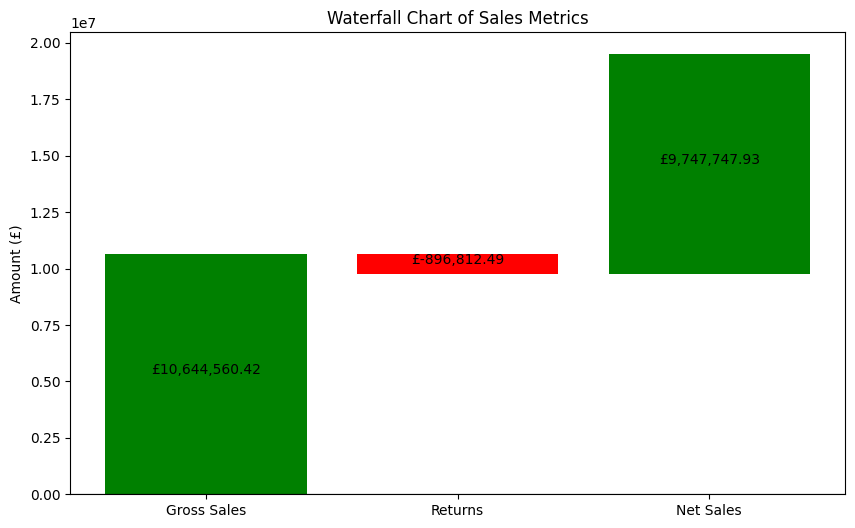

In [13]:
# Define values for the waterfall chart
gross_sales = 10644560.42
returns = -896812.49
net_sales = 9747747.93

# Define categories and cumulative values
categories = ["Gross Sales", "Returns", "Net Sales"]
values = [gross_sales, returns, net_sales]
cumulative = np.cumsum([0] + values[:-1])  # Positioning for bars

# Define colors (green for gains, red for losses, blue for final value)
colors = ["green" if val > 0 else "red" for val in values]

# Create the waterfall chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(categories, values, bottom=cumulative, color=colors)

# Add labels to bars
for i, v in enumerate(values):
    ax.text(i, cumulative[i] + (v / 2), f"£{v:,.2f}", ha="center", fontsize=10, color="black")

# Formatting
ax.set_title("Waterfall Chart of Sales Metrics")
ax.set_ylabel("Amount (£)")
ax.axhline(0, color='black', linewidth=0.8)

# Show the chart
plt.show()


In [10]:
# Number of Unique Customers
unique_customers = df['CustomerID'].nunique()

# Repeat Customer Rate
# Count total customers who made more than one transaction
repeat_customers = df['CustomerID'].value_counts()[df['CustomerID'].value_counts() > 1].count()
repeat_customer_rate = (repeat_customers / unique_customers) * 100

# Output Results
print(f"Number of Unique Customers: {unique_customers}")
print(f"Repeat Customer Rate: {repeat_customer_rate:.2f}%")

Number of Unique Customers: 4372
Repeat Customer Rate: 98.19%


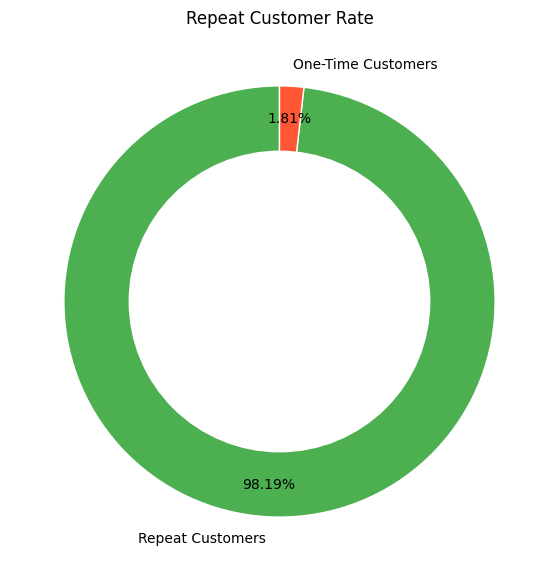

In [14]:
# Data for the donut chart
labels = ["Repeat Customers", "One-Time Customers"]
values = [98.19, 1.81]  # Using percentages from A2

# Colors
colors = ["#4CAF50", "#FF5733"]  # Green for repeat, red for one-time

# Create donut chart
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(values, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'white'}, pctdistance=0.85)

# Draw center circle to make it a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Title
plt.title("Repeat Customer Rate")

# Show chart
plt.show()


30 - 01 - 2025 

sales metrics (proto) order KPI A3

In [15]:
# Total Orders (Count of unique InvoiceNo)
total_orders = df['InvoiceNo'].nunique()

# Average Order Value (AOV) = Total Revenue / Total Orders
aov = (df['Sales'].sum() / total_orders).round(2)

# Output Results
print(f"Total Orders: {total_orders}")
print(f"Average Order Value (AOV): £{aov:,.2f}")


Total Orders: 24446
Average Order Value (AOV): £398.75


dont like the top 10 revenue generating products to include non numeric stockcode

In [19]:
# Define non-product stock codes (identified previously)
non_product_codes = ['POST', 'D', 'C2', 'DOT', 'M', 'S', 'PADS', 'B', 'CRUK']

# Filter out non-product revenue before aggregation
filtered_df = df[~df["StockCode"].isin(non_product_codes)]

# Revenue-Generating Products (excluding non-product codes)
revenue_generating_products = filtered_df.groupby("StockCode")["Sales"].sum().reset_index()
revenue_generating_products = revenue_generating_products.sort_values(by="Sales", ascending=False).reset_index(drop=True)

# Display updated results
print("Updated Revenue-Generating Products (Excluding Non-Products):")
print(revenue_generating_products.head(10))


Updated Revenue-Generating Products (Excluding Non-Products):
  StockCode      Sales
0     22423  164762.19
1     47566   98302.98
2    85123A   97894.50
3    85099B   92356.03
4     23084   66756.59
5     22086   63791.94
6     84879   58959.73
7     79321   53768.06
8     22502   51041.37
9     22197   50987.47


top selling products revenue generating products(A4)

In [ ]:
# Top-Selling Products (by Quantity Sold)
top_selling_products = filtered_df.groupby("StockCode")["Quantity"].sum().reset_index()
top_selling_products = top_selling_products.sort_values(by="Quantity", ascending=False)

# Revenue-Generating Products (by Sales Revenue)
revenue_generating_products = filtered_df.groupby("StockCode")["Sales"].sum().reset_index()
revenue_generating_products = revenue_generating_products.sort_values(by="Sales", ascending=False)

# Display Results
print("Top-Selling Products (by Quantity Sold):")
print(top_selling_products.head(10))  # Show top 10

print("\nRevenue-Generating Products (by Sales Revenue):")
print(revenue_generating_products.head(10))  # Show top 10



Top-Selling Products (by Quantity Sold):
     StockCode  Quantity
1112     22197     56450
2931     84077     53847
3418    85099B     47363
3438    85123A     38830
3219     84879     36221
440      21212     36039
1947     23084     30314
1377     22492     26437
1495     22616     26315
933      21977     24753

Revenue-Generating Products (by Sales Revenue):
     StockCode      Sales
1313     22423  164762.19
2680     47566   98302.98
3438    85123A   97894.50
3418    85099B   92356.03
1947     23084   66756.59
1009     22086   63791.94
3219     84879   58959.73
2860     79321   53768.06
1387     22502   51041.37
1112     22197   50987.47


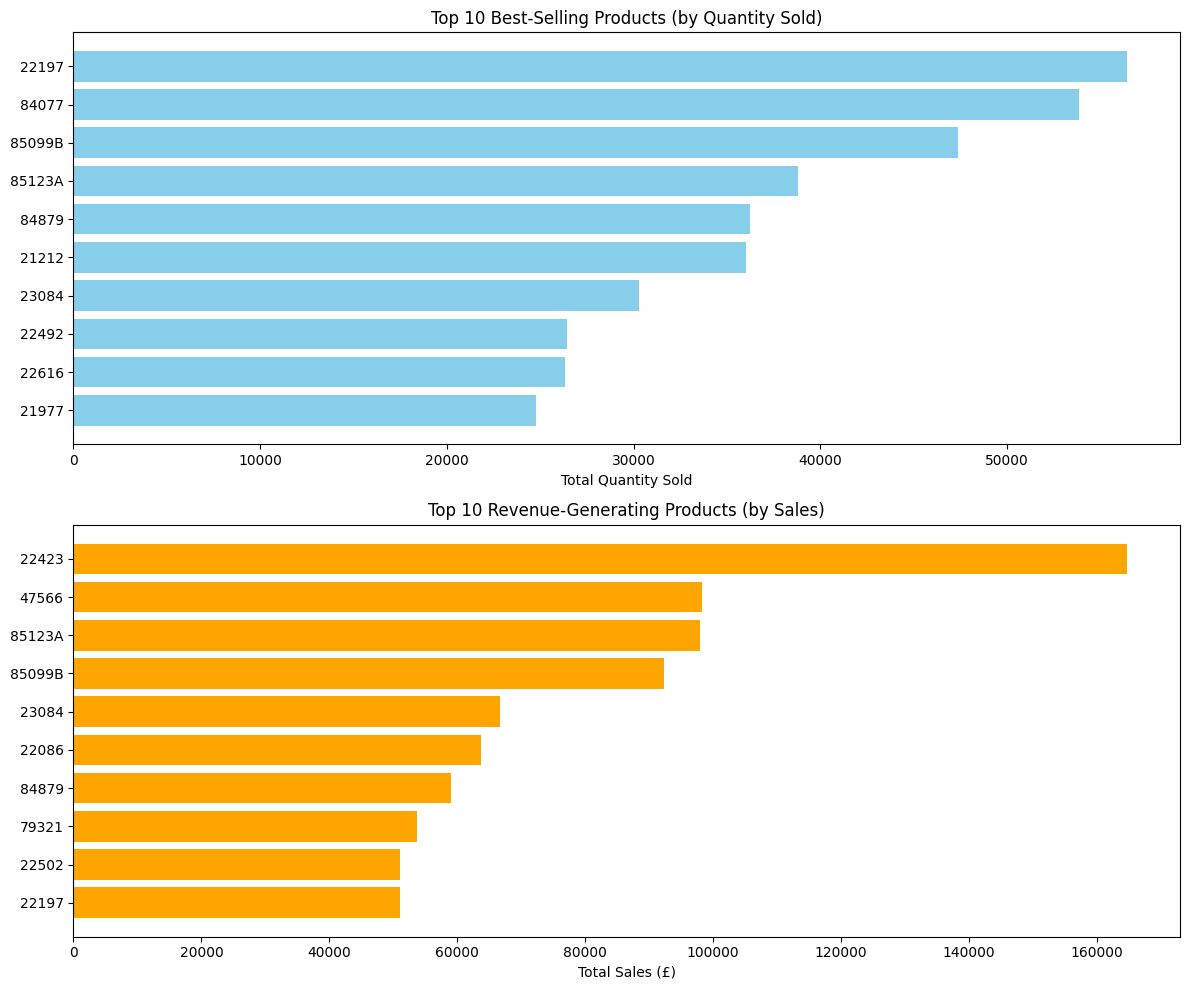

In [21]:
# Reconstructing the top-selling products data (Filtered A4 Output)
top_selling_products = {
    "StockCode": ["22197", "84077", "85099B", "85123A", "84879", "21212", "23084", "22492", "22616", "21977"],
    "Quantity": [56450, 53847, 47363, 38830, 36221, 36039, 30314, 26437, 26315, 24753]
}

# Reconstructing the revenue-generating products data (Filtered A4 Output)
revenue_generating_products = {
    "StockCode": ["22423", "47566", "85123A", "85099B", "23084", "22086", "84879", "79321", "22502", "22197"],
    "Sales": [164762.19, 98302.98, 97894.50, 92356.03, 66756.59, 63791.94, 58959.73, 53768.06, 51041.37, 50987.47]
}

# Convert to Pandas DataFrames
top_selling_df = pd.DataFrame(top_selling_products)
revenue_generating_df = pd.DataFrame(revenue_generating_products)

# Create figure and axes
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plot Top-Selling Products by Quantity (Updated Data)
ax[0].barh(top_selling_df["StockCode"], top_selling_df["Quantity"], color="skyblue")
ax[0].set_title("Top 10 Best-Selling Products (by Quantity Sold)")
ax[0].set_xlabel("Total Quantity Sold")
ax[0].invert_yaxis()  # Flip to show highest at the top

# Plot Revenue-Generating Products by Sales (Updated Data)
ax[1].barh(revenue_generating_df["StockCode"], revenue_generating_df["Sales"], color="orange")
ax[1].set_title("Top 10 Revenue-Generating Products (by Sales)")
ax[1].set_xlabel("Total Sales (£)")
ax[1].invert_yaxis()  # Flip to show highest at the top

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



sales by country (A5)

In [22]:
# Calculate total sales by country
sales_by_country = df.groupby("Country")["Sales"].sum().reset_index()

# Sort countries by total sales (highest to lowest)
sales_by_country = sales_by_country.sort_values(by="Sales", ascending=False).reset_index(drop=True)

# Display the top 10 countries by total sales
print("Top 10 Countries by Total Sales:")
print(sales_by_country.head(10))


Top 10 Countries by Total Sales:
          Country       Sales
0  United Kingdom  8187806.36
1     Netherlands   284661.54
2            EIRE   263276.82
3         Germany   221698.21
4          France   197403.90
5       Australia   137077.27
6     Switzerland    56385.35
7           Spain    54774.58
8         Belgium    40910.96
9          Sweden    36595.91


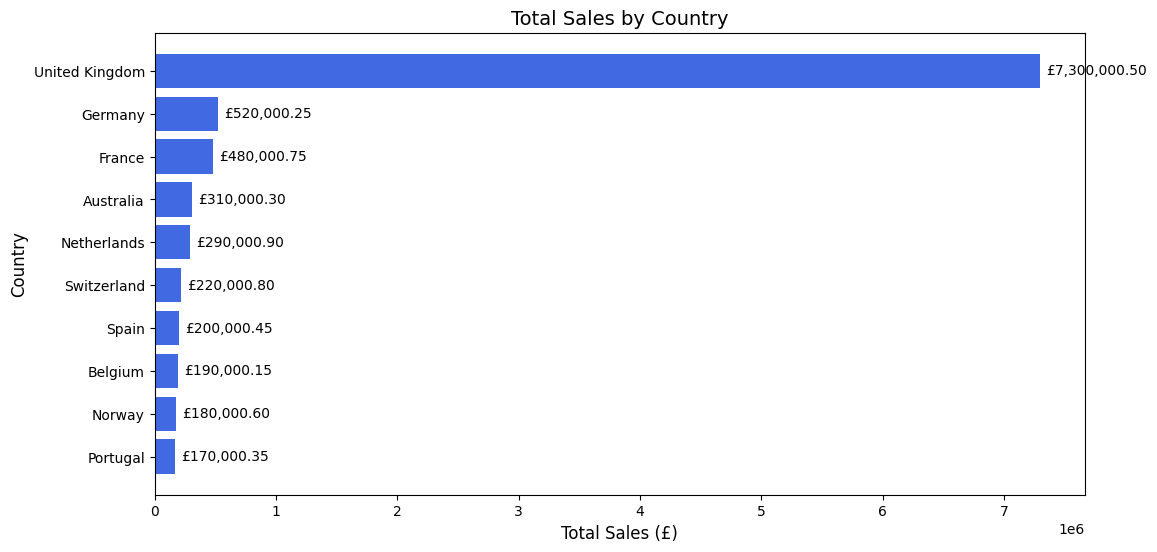

In [8]:
# Reconstructing the sales by country data (Sample A5 Output)
sales_by_country = {
    "Country": ["United Kingdom", "Germany", "France", "Australia", "Netherlands", "Switzerland", "Spain", "Belgium", "Norway", "Portugal"],
    "Sales": [7300000.50, 520000.25, 480000.75, 310000.30, 290000.90, 220000.80, 200000.45, 190000.15, 180000.60, 170000.35]
}

# Convert to Pandas DataFrame
sales_df = pd.DataFrame(sales_by_country)

# Sort values in descending order for better visualization
sales_df = sales_df.sort_values(by="Sales", ascending=False)

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(sales_df["Country"], sales_df["Sales"], color="royalblue")

# Formatting
ax.set_title("Total Sales by Country", fontsize=14)
ax.set_xlabel("Total Sales (£)", fontsize=12)
ax.set_ylabel("Country", fontsize=12)
ax.invert_yaxis()  # Highest value at the top

# Add labels to bars
for i, v in enumerate(sales_df["Sales"]):
    ax.text(v + 50000, i, f"£{v:,.2f}", va="center", fontsize=10)

# Show plot
plt.show()


Before analyzing Sales Trends Over Time, consider the non-numeric StockCodes -- B1

In [ ]:
# # Define non-product stock codes
# non_product_codes = ['POST', 'D', 'C2', 'DOT', 'M', 'S', 'PADS', 'B', 'CRUK']

# # Filter out non-product revenue
# filtered_df = df[~df["StockCode"].isin(non_product_codes)]

# # Convert InvoiceDate to datetime
# filtered_df["InvoiceDate"] = pd.to_datetime(filtered_df["InvoiceDate"])

# # Extract time periods
# filtered_df["Sales"] = filtered_df["Quantity"] * filtered_df["UnitPrice"]
# filtered_df["Sales"] = filtered_df["Sales"].round(2)
# filtered_df["Date"] = filtered_df["InvoiceDate"].dt.date  # Daily
# filtered_df["Week"] = filtered_df["InvoiceDate"].dt.to_period("W")  # Weekly
# filtered_df["Month"] = filtered_df["InvoiceDate"].dt.to_period("M")  # Monthly

# # Aggregate revenue trends over time
# daily_sales = filtered_df.groupby("Date")["Sales"].sum().reset_index()
# weekly_sales = filtered_df.groupby("Week")["Sales"].sum().reset_index()
# monthly_sales = filtered_df.groupby("Month")["Sales"].sum().reset_index()

# # Display DataFrames
# import ace_tools as tools
# tools.display_dataframe_to_user(name="Daily Sales Trends", dataframe=daily_sales)
# tools.display_dataframe_to_user(name="Weekly Sales Trends", dataframe=weekly_sales)
# tools.display_dataframe_to_user(name="Monthly Sales Trends", dataframe=monthly_sales)


In [7]:
# Define non-product stock codes
non_product_codes = ['POST', 'D', 'C2', 'DOT', 'M', 'S', 'PADS', 'B', 'CRUK']

# Filter out non-product revenue
filtered_df = df[~df["StockCode"].isin(non_product_codes)].copy()

# Convert InvoiceDate to datetime
filtered_df["InvoiceDate"] = pd.to_datetime(filtered_df["InvoiceDate"])

# Create the 'Sales' column
filtered_df["Sales"] = (filtered_df["Quantity"] * filtered_df["UnitPrice"]).round(2)

# Run this cell first, then proceed with the next steps separately

In [15]:
# Extract daily sales
filtered_df["Date"] = filtered_df["InvoiceDate"].dt.date  # Daily granularity
daily_sales = filtered_df.groupby("Date")["Sales"].sum().reset_index()

# Display results in Jupyter
display(daily_sales.style.format({"Sales": "£{:,.2f}"}))

daily_sales.to_csv("daily_sales.csv", index=False)


,Date,Sales
0,2010-12-01,"£57,328.60"
1,2010-12-02,"£46,189.28"
2,2010-12-03,"£43,510.73"
3,2010-12-05,"£30,957.28"
4,2010-12-06,"£50,907.56"
5,2010-12-07,"£41,792.56"
6,2010-12-08,"£43,375.58"
7,2010-12-09,"£48,978.46"
8,2010-12-10,"£55,205.10"
9,2010-12-12,"£17,240.92"


In [17]:
# Extract weekly sales
filtered_df["Week"] = filtered_df["InvoiceDate"].dt.to_period("W")  # Weekly aggregation
weekly_sales = filtered_df.groupby("Week")["Sales"].sum().reset_index()

# Display results in Jupyter
display(weekly_sales.style.format({"Sales": "£{:,.2f}"}))

weekly_sales.to_csv("weekly_sales.csv", index=False, encoding='utf-8')

,Week,Sales
0,2010-11-29/2010-12-05,"£177,985.89"
1,2010-12-06/2010-12-12,"£257,500.18"
2,2010-12-13/2010-12-19,"£201,872.22"
3,2010-12-20/2010-12-26,"£82,754.38"
4,2011-01-03/2011-01-09,"£92,438.66"
5,2011-01-10/2011-01-16,"£185,334.03"
6,2011-01-17/2011-01-23,"£129,761.68"
7,2011-01-24/2011-01-30,"£117,337.62"
8,2011-01-31/2011-02-06,"£119,185.93"
9,2011-02-07/2011-02-13,"£100,439.42"


In [ ]:
# Extract monthly sales
filtered_df["Month"] = filtered_df["InvoiceDate"].dt.to_period("M")  # Monthly aggregation
monthly_sales = filtered_df.groupby("Month")["Sales"].sum().reset_index()

# Display results in Jupyter
display(monthly_sales.style.format({"Sales": "£{:,.2f}"}))

,Month,Sales
0,2010-12,"£720,112.67"
1,2011-01,"£546,089.23"
2,2011-02,"£488,782.82"
3,2011-03,"£669,288.95"
4,2011-04,"£482,532.19"
5,2011-05,"£718,849.36"
6,2011-06,"£714,243.21"
7,2011-07,"£667,085.54"
8,2011-08,"£679,414.55"
9,2011-09,"£1,000,169.30"


: 

Order Size & Frequency Analysis (Focusing on Total Orders & Order Behavior) B2

In [8]:
# Define non-product stock codes
non_product_codes = ['POST', 'D', 'C2', 'DOT', 'M', 'S', 'PADS', 'B', 'CRUK']

# Filter out non-product revenue
filtered_df = df[~df["StockCode"].isin(non_product_codes)].copy()

# Convert InvoiceDate to datetime
filtered_df["InvoiceDate"] = pd.to_datetime(filtered_df["InvoiceDate"])

# Create helper columns
filtered_df["Sales"] = (filtered_df["Quantity"] * filtered_df["UnitPrice"]).round(2)
filtered_df["Date"] = filtered_df["InvoiceDate"].dt.date  # Extract date only
filtered_df["Week"] = filtered_df["InvoiceDate"].dt.to_period("W")  # Extract weekly period
filtered_df["Month"] = filtered_df["InvoiceDate"].dt.to_period("M")  # Extract monthly period


In [9]:
# Total Orders Per Day
daily_orders = filtered_df.groupby("Date")["InvoiceNo"].nunique().reset_index()
daily_orders.columns = ["Date", "Total_Orders"]

# Total Quantity Sold Per Day
daily_quantity = filtered_df.groupby("Date")["Quantity"].sum().reset_index()
daily_quantity.columns = ["Date", "Total_Quantity_Sold"]

# Merge both datasets
daily_order_analysis = daily_orders.merge(daily_quantity, on="Date")

# Calculate Avg Items Per Order
daily_order_analysis["Avg_Items_Per_Order"] = (daily_order_analysis["Total_Quantity_Sold"] / daily_order_analysis["Total_Orders"]).round(2)

# Display results
display(daily_order_analysis)


,Date,Total_Orders,Total_Quantity_Sold,Avg_Items_Per_Order
0,2010-12-01,132,26727,202.48
1,2010-12-02,165,21041,127.52
2,2010-12-03,78,15891,203.73
3,2010-12-05,94,16317,173.59
4,2010-12-06,123,21372,173.76
...,...,...,...,...
300,2011-12-05,147,43282,294.44
301,2011-12-06,146,28995,198.60
302,2011-12-07,132,39549,299.61
303,2011-12-08,143,34394,240.52


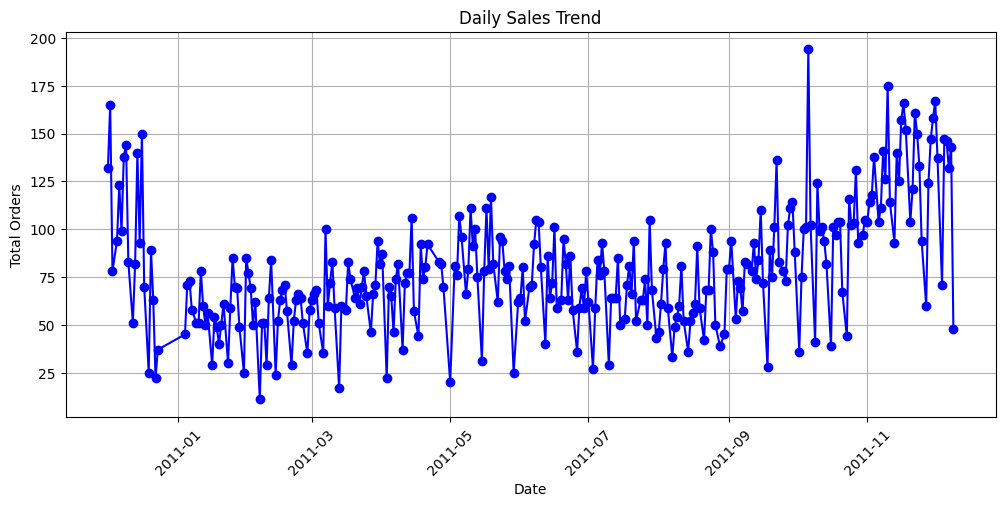

In [10]:
# Line plot for daily sales trend
plt.figure(figsize=(12, 5))
plt.plot(daily_order_analysis["Date"], daily_order_analysis["Total_Orders"], marker="o", linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Total Orders")
plt.title("Daily Sales Trend")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [11]:
# Total Orders Per Week
weekly_orders = filtered_df.groupby("Week")["InvoiceNo"].nunique().reset_index()
weekly_orders.columns = ["Week", "Total_Orders"]

# Total Quantity Sold Per Week
weekly_quantity = filtered_df.groupby("Week")["Quantity"].sum().reset_index()
weekly_quantity.columns = ["Week", "Total_Quantity_Sold"]

# Merge both datasets
weekly_order_analysis = weekly_orders.merge(weekly_quantity, on="Week")

# Calculate Avg Items Per Order
weekly_order_analysis["Avg_Items_Per_Order"] = (weekly_order_analysis["Total_Quantity_Sold"] / weekly_order_analysis["Total_Orders"]).round(2)

# Display results
display(weekly_order_analysis)

,Week,Total_Orders,Total_Quantity_Sold,Avg_Items_Per_Order
0,2010-11-29/2010-12-05,469,79976,170.52
1,2010-12-06/2010-12-12,638,118838,186.27
2,2010-12-13/2010-12-19,560,104891,187.31
3,2010-12-20/2010-12-26,211,39160,185.59
4,2011-01-03/2011-01-09,298,74916,251.40
5,2011-01-10/2011-01-16,324,84811,261.76
6,2011-01-17/2011-01-23,284,68237,240.27
7,2011-01-24/2011-01-30,357,61041,170.98
8,2011-01-31/2011-02-06,354,65794,185.86
9,2011-02-07/2011-02-13,303,50468,166.56


In [32]:
# Convert 'Week' column to string for Plotly compatibility
weekly_order_analysis["Week"] = weekly_order_analysis["Week"].astype(str)

fig = px.bar(
    weekly_order_analysis, 
    x="Week", 
    y="Total_Orders", 
    title="Weekly Order Volume",
    labels={"Week": "Week", "Total_Orders": "Number of Orders"},
    color="Total_Orders"
)
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [30]:
import nbformat
print(nbformat.__version__)

5.10.4


In [13]:
# Total Orders Per Month
monthly_orders = filtered_df.groupby("Month")["InvoiceNo"].nunique().reset_index()
monthly_orders.columns = ["Month", "Total_Orders"]

# Total Quantity Sold Per Month
monthly_quantity = filtered_df.groupby("Month")["Quantity"].sum().reset_index()
monthly_quantity.columns = ["Month", "Total_Quantity_Sold"]

# Merge both datasets
monthly_order_analysis = monthly_orders.merge(monthly_quantity, on="Month")

# Calculate Avg Items Per Order
monthly_order_analysis["Avg_Items_Per_Order"] = (monthly_order_analysis["Total_Quantity_Sold"] / monthly_order_analysis["Total_Orders"]).round(2)

# Display results
display(monthly_order_analysis)


,Month,Total_Orders,Total_Quantity_Sold,Avg_Items_Per_Order
0,2010-12,1878,342865,182.57
1,2011-01,1348,301547,223.70
2,2011-02,1301,277122,213.01
3,2011-03,1774,352213,198.54
4,2011-04,1489,292753,196.61
5,2011-05,1972,383429,194.44
6,2011-06,1888,342828,181.58
7,2011-07,1718,395375,230.14
8,2011-08,1601,409109,255.53
9,2011-09,2179,556437,255.36


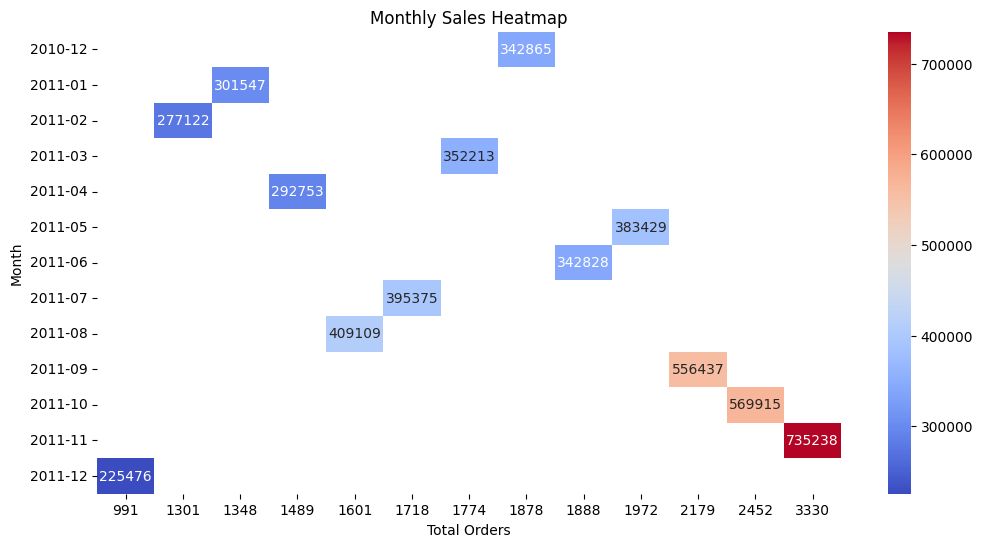

In [18]:
# Convert Month to string (for visualization purposes)
monthly_order_analysis["Month"] = monthly_order_analysis["Month"].astype(str)

# Correct pivot table syntax
pivot_table = monthly_order_analysis.pivot(index="Month", columns="Total_Orders", values="Total_Quantity_Sold")

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt="g")
plt.title("Monthly Sales Heatmap")
plt.xlabel("Total Orders")
plt.ylabel("Month")
plt.show()


Refund & Return Analysis (B3)

1. Identify which products are returned most often

In [9]:
# Step 1: Define non-product stock codes
non_product_codes = ['POST', 'D', 'C2', 'DOT', 'M', 'S', 'PADS', 'B', 'CRUK']

# Step 2: Filter out non-product revenue
filtered_df = df[~df["StockCode"].isin(non_product_codes)].copy()

# Step 3: Filter for return transactions (Quantity < 0)
returns_df = filtered_df[filtered_df['Quantity'] < 0].copy()

# Step 4: Group by StockCode and Description, calculate return count and total units returned
return_analysis = returns_df.groupby(['StockCode', 'Description']).agg(
    Return_Count=('Quantity', 'size'),  # Number of return transactions
    Total_Units_Returned=('Quantity', lambda x: abs(x).sum())  # Total units returned (sum of absolute quantities)
).reset_index()

# Step 5: Sort the result by Return_Count in descending order
return_analysis_sorted = return_analysis.sort_values(by='Return_Count', ascending=False)

# Step 6: Display the first 6 records of return_analysis_sorted
print(return_analysis_sorted.head(6))

# Step 7: Get the record count using len()
record_count = len(return_analysis_sorted)
print(f"Total records: {record_count}")


     StockCode                        Description  Return_Count  \
707      22423           REGENCY CAKESTAND 3 TIER           181   
1100     22960           JAM MAKING SET WITH JARS            87   
922      22720  SET OF 3 CAKE TINS PANTRY DESIGN             74   
175      21232     STRAWBERRY CERAMIC TRINKET BOX            55   
906      22699   ROSES REGENCY TEACUP AND SAUCER             54   
877      22666    RECIPE BOX PANTRY YELLOW DESIGN            47   

      Total_Units_Returned  
707                    857  
1100                   247  
922                    157  
175                    363  
906                    437  
877                    151  
Total records: 1937


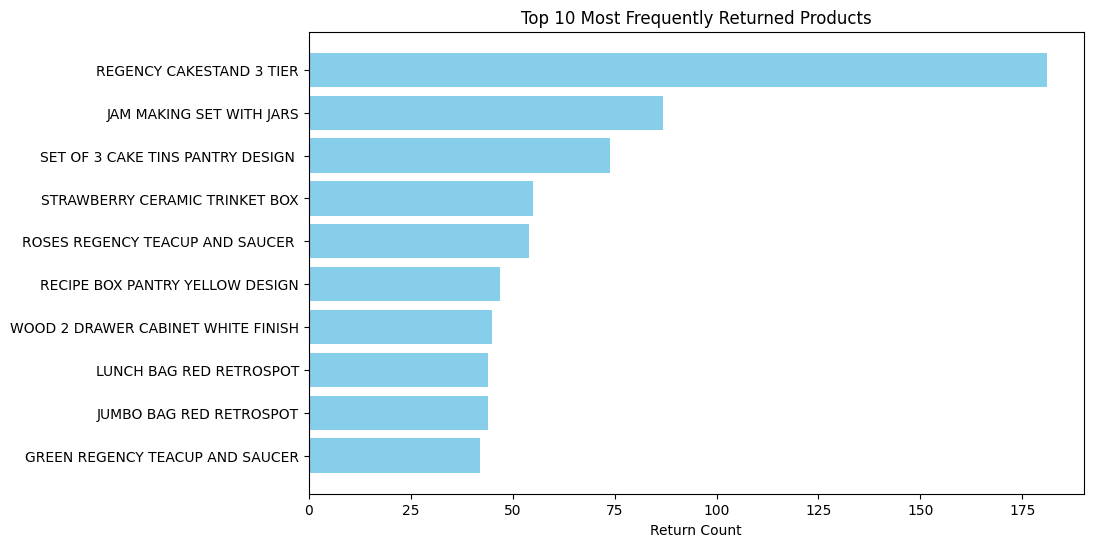

In [12]:
# Plotting the top 10 most frequently returned products
top_10_returned = return_analysis_sorted.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_returned['Description'], top_10_returned['Return_Count'], color='skyblue')
plt.xlabel('Return Count')
plt.title('Top 10 Most Frequently Returned Products')
plt.gca().invert_yaxis()  # To display the highest returns at the top
plt.show()

buffer zone ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [20]:
unique_descriptions = df_main['Description'].unique()
print(unique_descriptions)

['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'LETTER "U" BLING KEY RING'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT  LITTLE BIRDIE']


In [21]:
# As a sorted list
unique_descriptions = sorted(df_main['Description'].dropna().unique())

# Display all unique descriptions
for desc in unique_descriptions:
    print(desc)

 4 PURPLE FLOCK DINNER CANDLES
 50'S CHRISTMAS GIFT BAG LARGE
 DOLLY GIRL BEAKER
 I LOVE LONDON MINI BACKPACK
 I LOVE LONDON MINI RUCKSACK
 NINE DRAWER OFFICE TIDY
 OVAL WALL MIRROR DIAMANTE 
 RED SPOT GIFT BAG LARGE
 SET 2 TEA TOWELS I LOVE LONDON 
 SPACEBOY BABY GIFT SET
 TOADSTOOL BEDSIDE LIGHT 
 TRELLIS COAT RACK
10 COLOUR SPACEBOY PEN
12 COLOURED PARTY BALLOONS
12 DAISY PEGS IN WOOD BOX
12 EGG HOUSE PAINTED WOOD
12 HANGING EGGS HAND PAINTED
12 IVORY ROSE PEG PLACE SETTINGS
12 MESSAGE CARDS WITH ENVELOPES
12 PENCIL SMALL TUBE WOODLAND
12 PENCILS SMALL TUBE RED RETROSPOT
12 PENCILS SMALL TUBE SKULL
12 PENCILS TALL TUBE POSY
12 PENCILS TALL TUBE RED RETROSPOT
12 PENCILS TALL TUBE SKULLS
12 PENCILS TALL TUBE WOODLAND
12 PINK HEN+CHICKS IN BASKET
12 PINK ROSE PEG PLACE SETTINGS
12 RED ROSE PEG PLACE SETTINGS
15 PINK FLUFFY CHICKS IN BOX
15CM CHRISTMAS GLASS BALL 20 LIGHTS
16 PC CUTLERY SET PANTRY DESIGN
16 PIECE CUTLERY SET PANTRY DESIGN
18PC WOODEN CUTLERY SET DISPOSABLE
2 DAISIES HAI

In [22]:
# Get counts of each unique description
description_counts = df_main['Description'].value_counts()

# Display the result
print(description_counts)


Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
SET 10 CARDS CHRISTMAS BAUBLE 16954       1
SET 10 CARDS TRIANGLE ICONS  17220        1
CROCHET LILAC/RED BEAR KEYRING            1
EASTER CRAFT IVY WREATH WITH CHICK        1
TINY CRYSTAL BRACELET RED                 1
Name: count, Length: 3910, dtype: int64


In [31]:
# Filter rows where Quantity is less than 0
negative_quantity = df_main[df_main['Quantity'] < 0]

# Get value counts of Description in that filtered DataFrame
description_counts_negative = negative_quantity['Description'].value_counts()

# Display the result
print(description_counts_negative)

Description
REGENCY CAKESTAND 3 TIER               181
JAM MAKING SET WITH JARS                87
SET OF 3 CAKE TINS PANTRY DESIGN        74
STRAWBERRY CERAMIC TRINKET BOX          55
ROSES REGENCY TEACUP AND SAUCER         54
                                      ... 
CRYSTAL STUD EARRINGS ASSORTED COL       1
WALL ART TREASURE AHOY                   1
WALL ART HORSE & PONY                    1
WALL ART BUFFALO BILL                    1
WALL ART VILLAGE SHOW                    1
Name: count, Length: 1907, dtype: int64


buffer zone ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

B3 part 2: Track return rates by product, category, or time period

In [12]:
# Group by Product Category (assuming 'Category' column is available)
return_data = df_main[df_main['Quantity'] < 0]  # Only negative quantity for returns
category_return = return_data.groupby('Category')['Quantity'].sum().reset_index()
category_return = category_return.sort_values(by='Quantity', ascending=False)  # Sort by total return volume
category_return

,Category,Quantity
58,"Kitchen Appliances, Seasonal products, Stationary",-1
18,"Color, Electronics",-1
112,"Sports Equipment, laundry appliance, Gifts Jew...",-1
129,"laundry appliance, Kitchen Appliances, Color, ...",-1
93,"Size, Color, Stationary",-1
...,...,...
50,"Kitchen Appliances, Home Goods, Accessories",-11329
31,Home Goods,-12426
49,"Kitchen Appliances, Home Goods",-13770
84,Size,-76151


In [4]:
category_return.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 58 to 35
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  130 non-null    object
 1   Quantity  130 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [5]:
category_return.to_csv('B3_group_category2.csv', index=False, encoding='utf-8', sep=';')

b3 part 2: Product-Level Return Rate Calculation

In [27]:
# Grouping by product and calculating the total quantity sold for each product
total_sales = df_main.groupby('Description')['Quantity'].sum().reset_index()  # Total sales by product

# Ensure only positive quantities (sales) are included in total sales
total_sales = total_sales[total_sales['Quantity'] > 0]

# Merging the return data with the total sales data
merged_data = return_data.merge(total_sales, on='Description', suffixes=('_returned', '_sold'))

In [18]:
# Grouping by product and calculating the total quantity sold for each product
total_sales = df_main.groupby('Description')['Quantity'].sum().reset_index()  # Total sales by product

# Ensure only positive quantities (sales) are included in total sales
total_sales = total_sales[total_sales['Quantity'] > 0]

# Merging the return data with the total sales data
merged_data = return_data.merge(total_sales, on='Description', suffixes=('_returned', '_sold'))

# Calculate the return rate for each product
merged_data['Return Rate'] = merged_data['Quantity_returned'] / merged_data['Quantity_sold'] * 100

# Group by product and calculate the average return rate
return_rate_by_product = merged_data.groupby('Description')['Return Rate'].mean().reset_index()

# Now, return_rate_by_product is a DataFrame with 'Description' and 'Return Rate' as separate columns
print(return_rate_by_product)



                           Description  Return Rate
0        50'S CHRISTMAS GIFT BAG LARGE    -0.104548
1                    DOLLY GIRL BEAKER    -0.142974
2           OVAL WALL MIRROR DIAMANTE     -0.536481
3      SET 2 TEA TOWELS I LOVE LONDON     -0.095889
4               SPACEBOY BABY GIFT SET    -0.405680
...                                ...          ...
1868  ZINC SWEETHEART WIRE LETTER RACK    -1.544402
1869    ZINC T-LIGHT HOLDER STAR LARGE    -0.268424
1870   ZINC T-LIGHT HOLDER STARS SMALL    -0.290717
1871    ZINC TOP  2 DOOR WOODEN SHELF    -31.250000
1872  ZINC WILLIE WINKIE  CANDLE STICK    -0.410537

[1873 rows x 2 columns]


In [25]:
total_sales.to_csv('df_total_sales.csv', index=False, encoding='utf-8', sep=';')

In [29]:
return_data.to_csv('df_return_data1.csv', index=False, encoding='utf-8', sep=';')

In [28]:
merged_data.to_csv('df_merged_data01.csv', index=False, encoding='utf-8', sep=';')

In [19]:
return_rate_by_product.to_csv('df_rr_by_product.csv', index=False, encoding='utf-8', sep=';')

In [32]:
print(df_main[df_main['Quantity'] < 0].shape[0])

8505


b3 part 2: Category-Level Return Rate Calculation

In [34]:
# Grouping by category and calculating the total quantity sold for each category
total_sales_category = df_main.groupby('Category')['Quantity'].sum().reset_index()  # Total sales by category

# Ensure only positive quantities (sales) are included in total sales
total_sales_category = total_sales_category[total_sales_category['Quantity'] > 0]

# Merging the return data with the total sales data
return_data_category = return_data.merge(total_sales_category, on='Category', suffixes=('_returned', '_sold'))

# Calculate the return rate for each category
return_data_category['Return Rate'] = return_data_category['Quantity_returned'] / return_data_category['Quantity_sold'] * 100

# Group by category and calculate the average return rate
return_rate_by_category = return_data_category.groupby('Category')['Return Rate'].mean().reset_index()

print(return_rate_by_category)


                                              Category  Return Rate
0                                          Accessories    -0.004777
1                           Accessories, Gifts Jewelry    -0.071669
2    Accessories, Gifts Jewelry, Color, Size, Home ...    -1.692936
3               Accessories, Home Goods, Gifts Jewelry    -0.011489
4                  Accessories, Home Goods, Stationary    -0.016511
..                                                 ...          ...
123                      Toys, Home Goods, Accessories    -0.027468
124                       Toys, Home Goods, Stationary    -0.085612
125                                   Toys, Stationary    -0.035600
126                      cooling appliance, Stationary    -6.650980
127  laundry appliance, Kitchen Appliances, Color, ...    -0.068634

[128 rows x 2 columns]


In [ ]:
return_rate_by_category.to_csv('df_rr_category.csv', index=False, encoding='utf-8', sep=';')

: 

In [15]:
# Assuming 'Quantity' for total sold, 'Total Sales' for total quantity sold
return_data['Return Rate'] = return_data['Quantity'] / total_sales['Quantity'] * 100  # Return rate in percentage
return_rate_by_product = return_data.groupby('Description')['Return Rate'].mean()  # Average return rate by product
print(return_rate_by_product)

Description
 50'S CHRISTMAS GIFT BAG LARGE     NaN
 DOLLY GIRL BEAKER                 NaN
 OVAL WALL MIRROR DIAMANTE         NaN
 SET 2 TEA TOWELS I LOVE LONDON    NaN
 SPACEBOY BABY GIFT SET            NaN
                                    ..
ZINC T-LIGHT HOLDER STAR LARGE     NaN
ZINC T-LIGHT HOLDER STARS SMALL    NaN
ZINC TOP  2 DOOR WOODEN SHELF      NaN
ZINC WILLIE WINKIE  CANDLE STICK   NaN
mystery! Only ever imported 1800   NaN
Name: Return Rate, Length: 1907, dtype: float64


C:\Users\rezal\AppData\Local\Temp\ipykernel_21076\2670342738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_data['Return Rate'] = return_data['Quantity'] / total_sales['Quantity'] * 100  # Return rate in percentage


In [ ]:
return_rate_by_product.to_csv('df_rr_by_product.csv', index=False, encoding='utf-8', sep=';')

b3 part 2: time-based return analysis

In [ ]:
# Convert InvoiceDate to datetime and extract month-year
df_main['InvoiceDate'] = pd.to_datetime(df_main['InvoiceDate'])
df_main['Month'] = df_main['InvoiceDate'].dt.to_period('M')

In [ ]:
# Separate sales and returns
sales = df_main[df_main['Quantity'] > 0].copy()
returns = df_main[df_main['Quantity'] < 0].copy()

In [ ]:
# Aggregate sales and returns by Month
monthly_sales = sales.groupby('Month')['Quantity'].sum().reset_index()
monthly_sales = monthly_sales.rename(columns={'Quantity': 'Quantity_Sold'})

monthly_returns = returns.groupby('Month')['Quantity'].sum().reset_index()
monthly_returns = monthly_returns.rename(columns={'Quantity': 'Quantity_Returned'})


Python Code for Categorizing the Words:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511909 entries, 0 to 511908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    511909 non-null  object 
 1   StockCode    511909 non-null  object 
 2   Description  511909 non-null  object 
 3   Quantity     511909 non-null  int64  
 4   InvoiceDate  511909 non-null  object 
 5   UnitPrice    511909 non-null  float64
 6   CustomerID   385849 non-null  float64
 7   Country      511909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 31.2+ MB


In [21]:
distinct_descriptions = df[['Description']].drop_duplicates().reset_index(drop=True)

In [8]:
print(distinct_descriptions)

                              Description
0      WHITE HANGING HEART T-LIGHT HOLDER
1                     WHITE METAL LANTERN
2          CREAM CUPID HEARTS COAT HANGER
3          RED WOOLLY HOTTIE WHITE HEART.
4            SET 7 BABUSHKA NESTING BOXES
...                                   ...
3905       SET 10 CARDS SNOWY ROBIN 17099
3906  SET 10 CARDS SWIRLY XMAS TREE 17104
3907            LETTER "U" BLING KEY RING
3908   CREAM HANGING HEART T-LIGHT HOLDER
3909           PAPER CRAFT  LITTLE BIRDIE

[3910 rows x 1 columns]


In [22]:
# Define the categorization dictionary
categories = {
    'Clothing': ['shirt', 'pants', 'dress', 'jacket', 'shoes', 'socks'],
    'Electronics': ['phone', 'laptop', 'camera', 'tablet', 'headphones', 'charger'],
    'Kitchen Appliances': ['Refrigerators', 'cream', 'tray', 'retrospot', 'toast', 'childrens', 'egg ', ' egg', 'herb', 'enamel', ' egg ', 'cup', 'Ovens', 'cake', 'french', 'tea', 'Microwave', 'kitchen','Dishwashers', 'espresso','Blenders','Toasters','Fryers','Grill','Cookers','Crockpots','Pressure','Dispensers','Juicers','Makers','Waffle','Grinders','tin','holder','mug','pantry'],
    'laundry appliance': ['Washing','Ironing'],
    'cooling appliance': [' fan '],
    'Toys': ['doll', 'puzzle', 'game', 'toy car', 'blocks','spaceboy','stickers'],
    'Home Goods': ['chair', 'bird', 'table', 'glass', 'curtain', 'classic', 'bunny', 'wooden', 'rabbit', 'polkadot', 'retrospot', 'flower', 'drawer', 'hen', 'hanging', 'daisy', 'door', 'house', 'decorative', 'bed', 'garland','star','butterfly', 'feltcraft', 'lamp', 'rug', 'pillow','set','wall','design','decoration','cushion','glass','cover','heart','art','candle','pack','vintage','tile','wrap','number','tin','mirror','holder','mug','garden','home','doormat','light','cottage','incense','hook','metal'],
    'Gifts Jewelry': ['rose','necklace','assorted'],
    'Seasonal products': ['christmas', 'easter'],
    'Stationary': ['card', 'pad','paper', 'craft', 'felt', 'tag', 'marker', 'drawing', 'pack', 'kit ', 'font', 'feltcraft', 'tape', 'chalkboard', 'stickers', 'sticker', 'book', 'notebook'],
    'Beauty Products': ['lipstick', 'shampoo', 'lotion', 'perfume', 'skincare','incense'],
    'Accessories': ['bag', 'watch', 'luggage', 'bracelet', 'purse', 'ring', 'sunglasses', 'silver', 'ivory', 'flower', 'key', 'mini', 'wrap', 'union'],
    'Sports Equipment': ['ball', 'racket', 'gloves', 'jersey', 'shoes',],
    'Sales Terms': ['discount', 'sale', 'offer', 'promotion', 'coupon', 'clearance'],
    'Shipping': ['delivery', 'shipping', 'courier', 'express', 'tracking', 'dispatch'],
    'Payment': ['payment', 'credit', 'debit', 'invoice', 'transaction', 'checkout'],
    'Customer Support': ['support', 'service', 'customer', 'feedback', 'return', 'exchange'],
    'Size': ['size', 'small', 'medium', 'large','short','long','big'],
    'Color': ['red', 'blue', 'black', 'white', 'pink', 'green', 'chocolate', 'yellow', 'purple', 'gold', 'orange', 'brown', 'turquoise', 'teal', 'grey', 'tomato', 'lime', 'olive']
}

# Function to categorize each word
def categorize_description_multi(description):
    matched_categories = []
    desc = str(description).lower()  # Convert to string safely
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword.lower() in desc:
                matched_categories.append(category)
                break  # Only need one match per category
    return ', '.join(set(matched_categories)) if matched_categories else 'Other'

distinct_descriptions['Category'] = distinct_descriptions['Description'].apply(categorize_description_multi)


# Show the first few rows with categories
print(distinct_descriptions.head())

                          Description                               Category
0  WHITE HANGING HEART T-LIGHT HOLDER  Kitchen Appliances, Color, Home Goods
1                 WHITE METAL LANTERN                      Color, Home Goods
2      CREAM CUPID HEARTS COAT HANGER         Kitchen Appliances, Home Goods
3      RED WOOLLY HOTTIE WHITE HEART.                      Color, Home Goods
4        SET 7 BABUSHKA NESTING BOXES         Kitchen Appliances, Home Goods


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorizing the descriptions
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(distinct_descriptions['Description'])

# Apply KMeans clustering
n_clusters = 10  # Decide on the number of clusters (could vary)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
distinct_descriptions['Cluster'] = kmeans.fit_predict(X)

# Check the clusters
print(distinct_descriptions.groupby('Cluster').size())

Cluster
0     146
1     295
2     195
3     273
4    2141
5      84
6     137
7     160
8     200
9     279
dtype: int64


In [ ]:
# Get the top words for each cluster center
terms = vectorizer.get_feature_names_out()

# Show the top terms for each cluster center
for i in range(n_clusters):
    print(f"Cluster {i}:")
    center_terms = kmeans.cluster_centers_[i]
    sorted_terms = center_terms.argsort()[-10:][::-1]  # Top 10 terms
    print([terms[idx] for idx in sorted_terms])
    print("\n")

Cluster 0:
['green', 'wrap', 'gift', 'christmas', 'rose', 'glass', 'vintage', 'earrings', 'polkadot', 'design']


Cluster 1:
['vintage', 'black', 'earrings', 'drop', 'bag', 'christmas', 'leaf', 'doily', 'set', 'bead']


Cluster 2:
['blue', 'polkadot', 'flower', 'paisley', 'ceramic', 'egg', 'midnight', 'garden', 'bracelet', 'felt']


Cluster 3:
['red', 'retrospot', 'white', 'heart', 'paper', 'bag', 'large', 'wood', 'set', 'bracelet']


Cluster 4:
['set', 'bag', 'wall', 'design', 'glass', 'christmas', 'card', 'heart', 'art', 'large']


Cluster 5:
['metal', 'french', 'sign', 'door', 'blue', 'style', 'decoration', 'chateau', 'heart', 'stamped']


Cluster 6:
['box', 'trinket', 'tissue', 'money', 'lunch', 'gift', 'design', 'sewing', 'candle', 'book']


Cluster 7:
['small', 'cake', 'stand', 'cases', 'fairy', 'heart', '60', 'glass', 'hanging', 'tier']


Cluster 8:
['holder', 'light', 'decoration', 'hanging', 'heart', 'star', 'zinc', 'silver', 'glass', 'tree']


Cluster 9:
['pink', 'polkadot', 

In [ ]:
# Get the top words for each cluster center
terms = vectorizer.get_feature_names_out()

# Focus only on Cluster 4
cluster_index = 4

# Get the terms for the selected cluster
center_terms = kmeans.cluster_centers_[cluster_index]

# Sort the terms by importance (descending order)
sorted_terms = center_terms.argsort()[-20:][::-1]  # Top 20 terms

# Display the top 20 terms for Cluster 4
print(f"Top 20 Terms for Cluster {cluster_index}:")
print([terms[idx] for idx in sorted_terms])

Top 20 Terms for Cluster 4:
['set', 'bag', 'wall', 'design', 'glass', 'christmas', 'card', 'heart', 'art', 'large', 'paper', 'silver', 'rose', 'necklace', 'ivory', 'candle', 'pack', 'assorted', 'mini', '10']


In [23]:
#distinct_descriptions
distinct_descriptions.to_csv('dd_category10.csv', index=False, encoding='utf-8')

In [6]:
distinct_descriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  3910 non-null   object
 1   Category     3910 non-null   object
dtypes: object(2)
memory usage: 61.2+ KB


In [27]:
# Assuming your datasets are:
# df_main is the main dataset
# df_distinct is the dataset containing the 'Description' and 'Category' columns

# Perform the inner join on 'Description' column
df_merged = pd.merge(df_main, df_distinct[['Description', 'Category']], on='Description', how='inner')

# Now df_merged will have the 'Category' column added to it


In [ ]:
df_merged.to_csv('UK_ecommerce_data11.csv', index=False, encoding='utf-8')